# Project 2 - No-show Appointments analysis

This project aims to analyze a No-show medical appointments dataset from Brazil in 2016. Some questions about the dataset are made and going to be analyzed:



* Age is related to missing an appointment?
* Gender is related to going or missing an appointment?



In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Listing file names in folder
! ls

No-show-med-appointments.ipynb
noshowappointments-may-2016.csv


In [3]:
# Opening csv file with dataset

df_app = pd.read_csv('noshowappointments-may-2016.csv', sep=',')
df_app.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df_app.shape

(110527, 14)

In [5]:
df_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
# Verifying if columns defined as 'object' are strings

print("Gender is", type(df_app['Gender'][0]))
print("Heighbourhood is", type(df_app['Neighbourhood'][0]))
print("No-show is", type(df_app['No-show'][0]))

Gender is <class 'str'>
Heighbourhood is <class 'str'>
No-show is <class 'str'>


The 3 columns above have string values which is ok. 

ScheduledDay and AppointmentDay columns have a clear "mix" of data: time of appointment and day, so a 'split process' will be done later. Since this project is just going to analyze the AppointmentDay feature, ScheduledDay column will be excluded.

In [7]:
# Excluding ScheduledDay column
del df_app['ScheduledDay']
df_app.head(5)

,PatientId,AppointmentID,Gender,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [8]:
# Function to check unique values from a column

def uniqueValues (columnName):
    unVal = df_app[columnName].unique()
    return unVal

# Checking unique values of No-show column in dataframe
uniqueValues('No-show')

array(['No', 'Yes'], dtype=object)

In [9]:
# Checking duplicated rows in dataset
sum(df_app.duplicated())

0

In [10]:
# Checking NaN values in columns
df_app.isna().sum(axis=0)

PatientId         0
AppointmentID     0
Gender            0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

 No duplicated or NaN values in the dataframe. Next step is to split AppointmentDay column in date and time.

In [11]:
df_app['AppointmentDay'] = pd.to_datetime(df_app['AppointmentDay'])
df_app['AppointmentDay'].head()

0   2016-04-29 00:00:00+00:00
1   2016-04-29 00:00:00+00:00
2   2016-04-29 00:00:00+00:00
3   2016-04-29 00:00:00+00:00
4   2016-04-29 00:00:00+00:00
Name: AppointmentDay, dtype: datetime64[ns, UTC]

In [12]:
df_app['AppointmentTime'] = df_app['AppointmentDay'].dt.time
df_app.head()

,PatientId,AppointmentID,Gender,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,AppointmentTime
0,2.987250e+13,5642903,F,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,00:00:00
1,5.589978e+14,5642503,M,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,00:00:00
2,4.262962e+12,5642549,F,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,00:00:00
3,8.679512e+11,5642828,F,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,00:00:00
4,8.841186e+12,5642494,F,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,00:00:00


In [13]:
# Verifying unique values of AppointmentTime column in the dataframe

uniqueValues('AppointmentTime')

array([datetime.time(0, 0)], dtype=object)

Appointment time just have 1 value 00:00, so this data isn't relevant for the anlysis. It will be excluded from the dataset

In [14]:
del df_app['AppointmentTime']
df_app.head(5)

,PatientId,AppointmentID,Gender,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [15]:
# Transforming AppointmentDay column in a date
df_app['AppointmentDay'] = df_app['AppointmentDay'].dt.date
df_app.head()

,PatientId,AppointmentID,Gender,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [16]:
type(df_app['AppointmentDay'][0])

datetime.date

In [17]:
df_app['AppointmentDay'].unique()

array([datetime.date(2016, 4, 29), datetime.date(2016, 5, 3),
       datetime.date(2016, 5, 10), datetime.date(2016, 5, 17),
       datetime.date(2016, 5, 24), datetime.date(2016, 5, 31),
       datetime.date(2016, 5, 2), datetime.date(2016, 5, 30),
       datetime.date(2016, 5, 16), datetime.date(2016, 5, 4),
       datetime.date(2016, 5, 19), datetime.date(2016, 5, 12),
       datetime.date(2016, 5, 6), datetime.date(2016, 5, 20),
       datetime.date(2016, 5, 5), datetime.date(2016, 5, 13),
       datetime.date(2016, 5, 9), datetime.date(2016, 5, 25),
       datetime.date(2016, 5, 11), datetime.date(2016, 5, 18),
       datetime.date(2016, 5, 14), datetime.date(2016, 6, 2),
       datetime.date(2016, 6, 3), datetime.date(2016, 6, 6),
       datetime.date(2016, 6, 7), datetime.date(2016, 6, 1),
       datetime.date(2016, 6, 8)], dtype=object)

Analyzing the unique values, it is possible to verify that the appointments were scheduled in just 3 months: April, May and June. As the day doesn't matter in this analysis, the AppointmentMonth column will be created and replace the 'AppointmentDay column.

In [18]:
df_app.rename(columns={'AppointmentDay' : 'AppointmentMonth'}, inplace=True)

df_app['AppointmentMonth'] = pd.to_datetime(df_app['AppointmentMonth'])
df_app['AppointmentMonth'] = df_app['AppointmentMonth'].dt.strftime('%m')
df_app.head(5)

,PatientId,AppointmentID,Gender,AppointmentMonth,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,04,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,04,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,04,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,04,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,04,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [19]:
# Checking unique values od AppointmentMonth column

uniqueValues('AppointmentMonth')

array(['04', '05', '06'], dtype=object)

As there is just 3 months of data in the dataset, this feature won't be relevant to the analysis and will be excluded from the dataframe.
The PatientId and AppointmentID columns aren't relevant to this analysis, so they will also be excluded.

In [20]:
del df_app['AppointmentMonth']
del df_app['PatientId']
del df_app['AppointmentID']

In [21]:
df_app.head(3)

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [22]:
# Checking values in Age column
uniqueValues('Age')

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1],
      dtype=int64)

There is a negative value in 'Age' column, which will be removed from the dataframe

In [23]:
# Deleting negative value and checking change 

df_app.drop(df_app.loc[df_app['Age'] == -1].index, inplace=True)
uniqueValues('Age')

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99],
      dtype=int64)

Now that the features were filtred, a check about the correlations between them will be done.

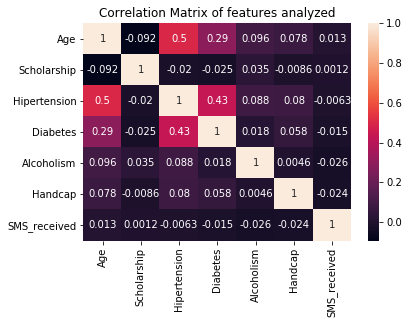

In [24]:
corrMatrix = df_app.corr()
sns.heatmap(corrMatrix, annot=True)
plt.title('Correlation Matrix of features analyzed')
plt.show()

It is possible to verify a positive correlation between Age-Hipertension, Age-Diabetes and Diabetes-Hipertension

## Plotting and Analyzing results

In [25]:
df_app.Gender.value_counts()

F    71839
M    38687
Name: Gender, dtype: int64

## Question 1: Gender is related to going or missing an appointment?

First an analysis comparing Gender and No-show appointments will be made

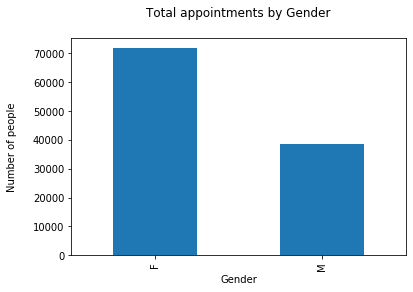

In [26]:
df_app['Gender'].value_counts().plot(kind='bar')
plt.title('Total appointments by Gender\n')
plt.ylabel('Number of people\n')
plt.xlabel('Gender')
plt.show()

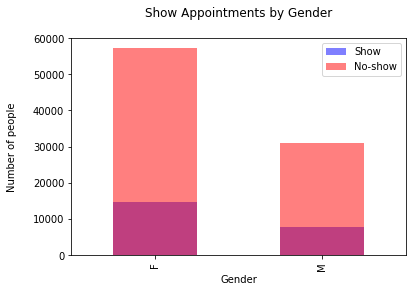

In [27]:
# Creating Dataframes with Show and No-show appointments
df_yes = df_app[df_app['No-show'] == "Yes"]
df_no = df_app[df_app['No-show'] == "No"]

# Plotting Appointments according to gender
df_yes['Gender'].value_counts().plot(alpha=0.5, kind='bar', label='Show', color ='b')
df_no['Gender'].value_counts().plot(alpha=0.5, kind='bar', label='No-show', color='r')

plt.legend()
plt.title('Show Appointments by Gender\n')
plt.xlabel('Gender')
plt.ylabel('Number of people\n')
plt.show()

It is possible to observe that the total of female patients that go to appointments are higher than the male group. The attendance is almost two times higher if compared with the number of male appointments. 

Analysing the bar chart, the number of female appointments is also almost the double of the number of male appointments in the dataset, so there is no significant difference between the proportion of no-show appointments in each group. An analysis of proportions between each group should be made in order to verify the attendance, which is not the aim of this project.

## Question 2: Age is related to missing an appointment?

Moving on, another feature will be analyzed: age related to no-show appointments

In [28]:
# Creating an old and young mask. The dataset was divided in two masks, in order to turn the bar chart "less crowded"
young = df_app[df_app['Age'] < 50]
old = df_app[df_app['Age'] > 50]
old.head(5)

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,F,76,REPÚBLICA,0,1,0,0,0,0,No


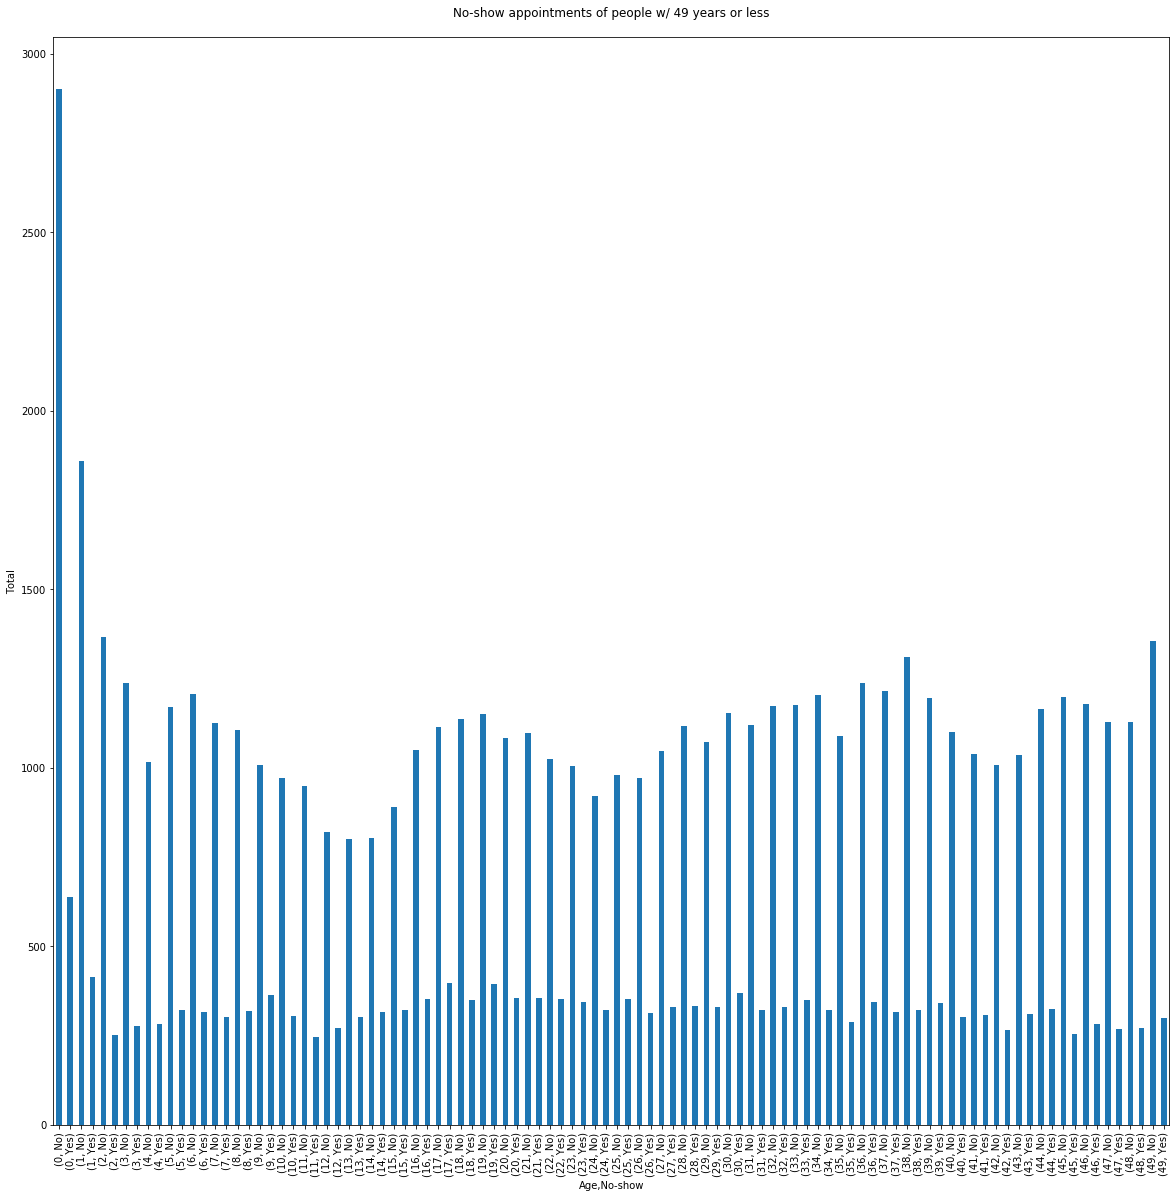

In [29]:
# Plotting results of young
plt.title('No-show appointments of people w/ 49 years or less\n')
plt.ylabel('Total')
young.groupby('Age')['No-show'].value_counts().plot(kind='bar', figsize=(20,20))

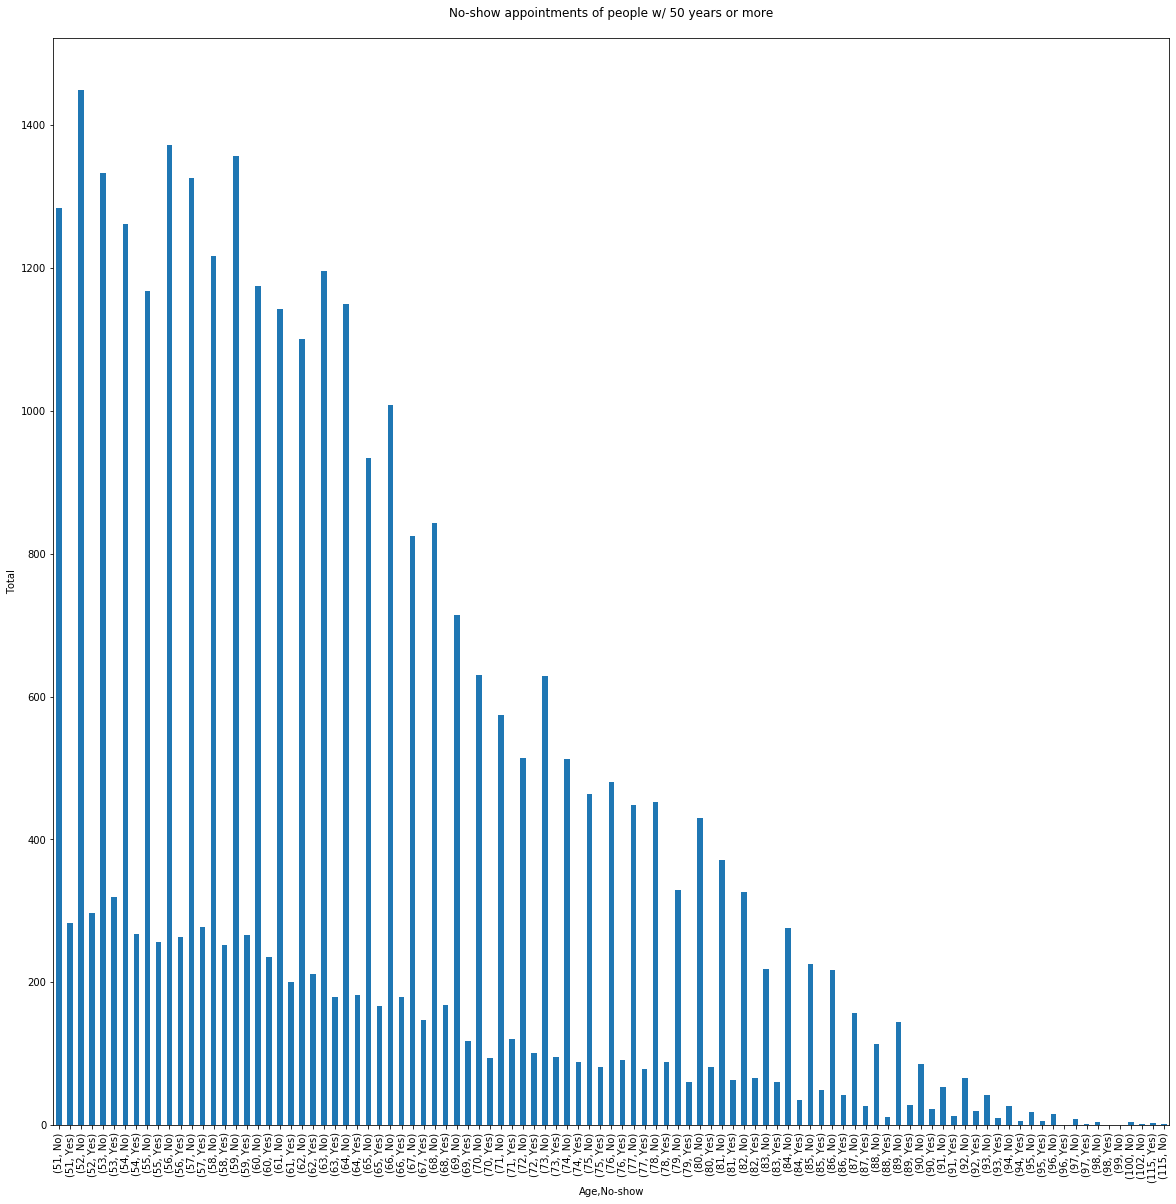

In [30]:
plt.title('No-show appointments of people w/ 50 years or more\n')
plt.ylabel('Total')
old.groupby('Age')['No-show'].value_counts().plot(kind='bar', figsize=(20,20))

Plotting the trend of attendance of appointments

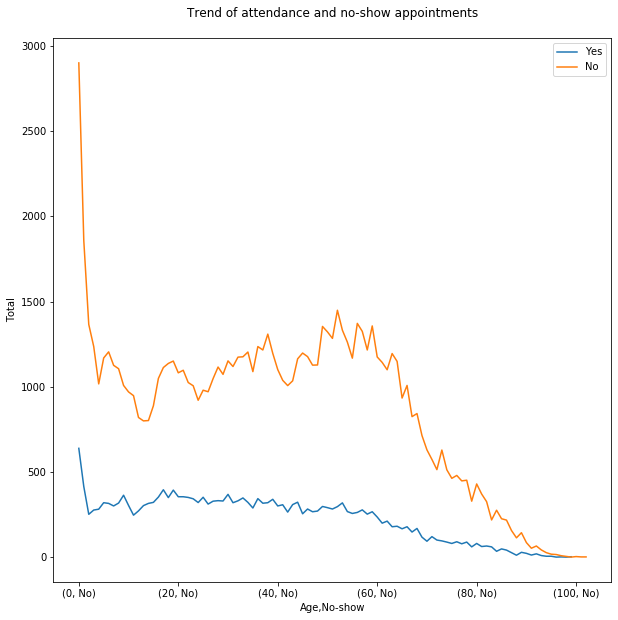

In [31]:
plt.title('Trend of attendance and no-show appointments\n')
plt.ylabel('Total')
df_yes.groupby('Age')['No-show'].value_counts().plot(kind='line', figsize=(10,10), label='Yes')
df_no.groupby('Age')['No-show'].value_counts().plot(kind='line', figsize=(10,10),label='No')
plt.legend()

It is possible to observe that the number of appointments of children and babies are much higher. Also, the attendance at consultations of a 2 year old is almost the same as the attendance of a 49 year old person in the dataset.

It is possible to verify that after 53 years, the number of attendance to appointments declines through the year. Probably because there are fewer old people in the dataset.

# Conclusion


#### Results
It is possible to verify through the analysis that gender isn't a relevant factor in no-show appointment. Males and females tend to go to appointments in almost the same proportion in each "gender group". 

People that have less than 2 years are more susceptible to have a scheduled appointment and attend to medical appointments more often. The number of attendance to appointments declines through the year. Probably because there are fewer old people in the dataset.


#### Limitations

The project could have one particular ingredient that could make it more interesting: statistical analysis. It wasn't made on this project because the next project envolves this subject.

The gender bar chart doesn't appear to have the same total of people than the previous chart (the blue one), because in the second case the charts were overlaid. Also, this kind of plot changes the color of one plotted feature, which could result in a confusion of the analysis.

The line graph to analyze the trend of attendance shows an incorrect labels. It needs to be corrected.